In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_pixel_value(img, center, x, y):
    
    new_value = 0
    
    try:
        # If neighbourhood pixel value >= center pixel value, then set it to 1
        if img[x][y] >= center:
            new_value = 1
            
    except:
        # Exception is required when neighbourhood value of a center pixel value is null i.e. values present at boundaries.
        pass
    
    return new_value

In [3]:
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
    
    center = img[x][y]
    
    val_ar = []
    
    # top_left
    val_ar.append(get_pixel_value(img, center, x-1, y-1))
    
    # top
    val_ar.append(get_pixel_value(img, center, x-1, y))
    
    # top_right
    val_ar.append(get_pixel_value(img, center, x-1, y + 1))
    
    # right
    val_ar.append(get_pixel_value(img, center, x, y + 1))
    
    # bottom_right
    val_ar.append(get_pixel_value(img, center, x + 1, y + 1))
    
    # bottom
    val_ar.append(get_pixel_value(img, center, x + 1, y))
    
    # bottom_left
    val_ar.append(get_pixel_value(img, center, x + 1, y-1))
    
    # left
    val_ar.append(get_pixel_value(img, center, x, y-1))
    
    # Now, we need to convert binary values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    
    val = 0
    
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
        
    return val

In [4]:
# Insert image path here
path = r'C:\Users\hppc\Desktop\test.jpg'
img_rgb = cv2.imread(path, 1)

height, width, _ = img_rgb.shape

# Converting RGB image into grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Create a numpy array as the same height and width of RGB image
img_lbp = np.zeros((height, width), np.uint8) 

for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

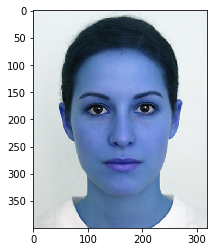

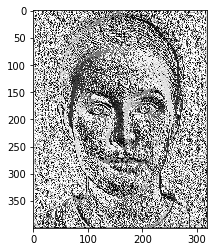

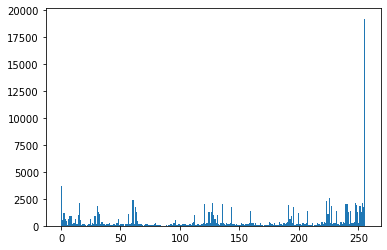

In [5]:
plt.imshow(img_rgb)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

# plt.hist(img_gray.ravel(), 256, [0,256])
# plt.show()

plt.hist(img_lbp.ravel(), 256, [0,256])
plt.show()